## T Test
A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

# One-sample T-test with Python
The test will tell us whether means of the sample and the population are different



In [32]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [33]:
import numpy as np

In [34]:
len(ages)

32

In [35]:
age_mean=np.mean(ages)
age_mean

30.34375

In [36]:
sample_size=10
age_sample=np.random.choice(ages,sample_size)
age_sample

array([18, 50, 18, 28, 24, 26, 17, 50, 16, 65])

In [37]:
from scipy.stats import ttest_1samp

In [39]:
ttest,p_value=ttest_1samp(age_sample,30)

In [40]:
p_value

0.832066352106992

In [41]:
if(p_value<=0.05):
    print("We are rejecting Null Hypothesis")
else:
    print("We are Accepting Null Hypothesis")

We are Accepting Null Hypothesis


# Some More Examples
Consider the age of students in a college and in Class A

In [56]:
import pandas as pd
import scipy.stats as stats
import math
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [57]:
np.mean(classA_ages)

48.55

In [58]:
school_ages_mean= np.mean(school_ages)
school_ages_mean

53.120666666666665

In [63]:
ttest,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages_mean)

In [64]:
p_value

3.582823889943786e-09

In [65]:
if(p_value<=0.05):
    print("We are rejecting Null Hypothesis")
else:
    print("We are Accepting Null Hypothesis")

We are rejecting Null Hypothesis


# Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test



In [66]:
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()

51.85

In [68]:
_,p_value=stats.ttest_ind(a=classA_ages,b=ClassB_ages,equal_var=False)

In [69]:
p_value

0.0010842657096474689

In [70]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


# Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test

In [71]:

weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [73]:
weight1


[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]

In [74]:
weight2

array([19.12781913, 33.9642795 , 28.95810576, 27.51835175, 32.50207118,
       31.83649084, 21.44890694, 16.94785698, 32.2743819 , 37.59884706,
       26.69264411, 28.55567509, 32.91201298, 25.48887881, 39.67966886])

In [75]:

weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [76]:
weight_df

,weight_10,weight_20,weight_change
0,25,19.127819,-5.872181
1,30,33.964279,3.964279
2,28,28.958106,0.958106
3,35,27.518352,-7.481648
4,28,32.502071,4.502071
5,34,31.836491,-2.163509
6,26,21.448907,-4.551093
7,29,16.947857,-12.052143
8,30,32.274382,2.274382
9,26,37.598847,11.598847


In [82]:

_,p_value=stats.ttest_rel(a=weight1,b=weight2)

In [83]:
p_value

0.3557838300062992

In [86]:
if p_value <= 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


# Correlation

In [96]:
import seaborn as sns
df=sns.load_dataset('iris')

In [91]:
df.shape

(150, 5)

In [93]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


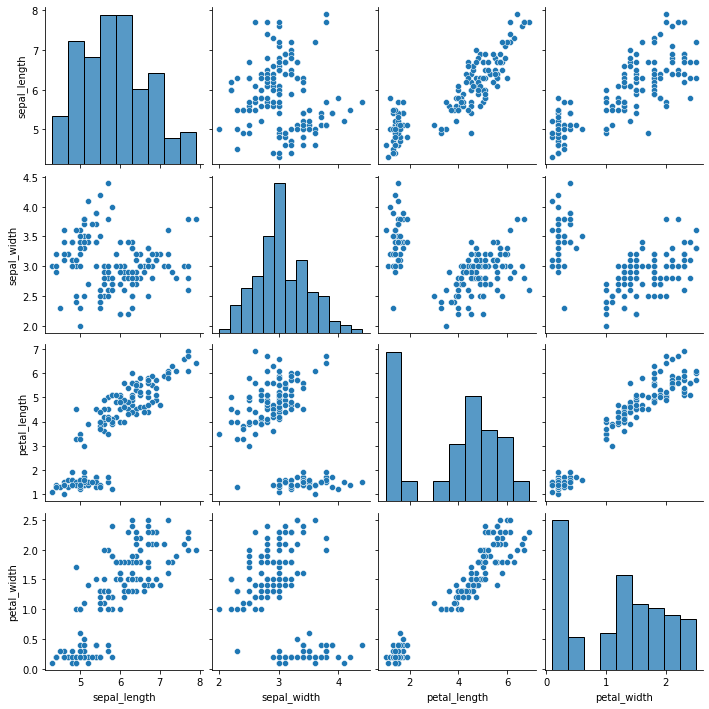

In [94]:
sns.pairplot(df)

# Chi-Square Test 

  The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [1]:
import scipy.stats as stats

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
df=sns.load_dataset("tips")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
dataset_table=pd.crosstab(df['sex'],df['smoker'])
dataset_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [5]:
dataset_table.values

array([[60, 97],
       [33, 54]], dtype=int64)

In [7]:
val=stats.chi2_contingency(dataset_table)

In [8]:
val

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [28]:
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


In [29]:
excepted_values=val[3]
excepted_values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [30]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_colm=len(dataset_table.iloc[0,0:2])
no_of_colm

2

In [31]:
ddof=(no_of_rows-1)*(no_of_colm-1)
ddof
alpha=0.05

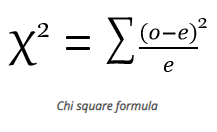

In [33]:

from scipy.stats import chi2
chi_square=sum([(o-e)**2/e for o,e in zip(Observed_Values,excepted_values)])
chi_square

array([0.00119737, 0.00073745])

In [34]:
chi_square_statistic=chi_square[0]+chi_square[1]
chi_square_statistic

0.001934818536627623

In [35]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [36]:
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
